# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scikitplot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,510,86,43,70,126,56,6,148,46,19,145,166,317,171,86,6,9,179,182
1,348,95,44,84,158,62,10,145,46,19,148,163,312,166,64,10,6,199,206
2,739,96,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202
3,423,85,45,70,120,54,7,149,45,19,145,169,326,186,81,8,4,181,184
4,531,107,55,103,167,49,7,252,27,28,172,269,904,239,83,5,30,179,186
5,717,96,46,74,202,74,5,163,39,20,149,185,408,191,70,7,8,196,200
6,683,110,56,109,199,57,5,251,27,27,169,272,928,268,82,11,10,183,183
7,569,97,35,66,151,64,8,128,52,18,129,148,246,112,66,6,2,195,200
8,511,88,38,77,156,56,7,163,41,20,129,184,395,140,67,1,9,192,198
9,744,96,46,88,174,68,10,155,43,19,148,173,354,182,69,14,15,194,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.349727,93.360656,44.661202,81.648452,168.309654,61.688525,8.519126,167.774135,41.231330,20.504554,147.557377,187.581056,434.389800,174.067395,72.382514,6.686703,12.513661,188.930783,195.621129
std,242.847331,8.395188,6.165744,15.786391,34.220767,8.119291,4.485795,33.320332,7.913033,2.596052,14.498895,31.738256,176.469795,33.166372,7.432626,4.913506,8.899802,6.244614,7.463927
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,202.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,150.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,422.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,361.000000,172.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,197.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,186.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [6]:
y_train[:5]

array(['bus', 'van', 'van', 'bus', 'bus'], dtype=object)

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations.

**_<font color=blue>Observations:</font>_**

- About target: Since `LogisticRegression` can already handle string categories (like in our data) we **won't use** any sort of label encoding.
- About features: One of the hyperparameters to tune in `LogisticRegression` is `penalty`. Since regularization is scale sensitive, anytime we enable some sort of regularization (`l1`, `l2` or `elasticnet`) we'll normalize the data (feature matrix) first. If `penalty=None`, then scaling may not be needed but we also may be interesed in seeing what result we get by scaling the feature data anyway (even though `sag` and `saga` solvers are guaranteed to have a fast convergence only on features with approximately the same scale).

In [7]:
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).


*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

**_<font color=blue>Observations:</font>_**

In order to enable/disable scaling according to the penalty we choose from, we're going to create a `CustomStandardScaler` which just call `sklearn.preprocessing.StandardScaler` whenever `scaling=True` or just return the original data whenever `scaling=False`.

Then from the explanation above, we'll want to find the best hyperparameters (and model) among the following settings:

1. `penalty=None` and `scaling=True` or `False`.
2. `penalty != None` and `scaling=True`.

It makes sense to include all of this in a pipeline.

In [8]:
### YOUR CODE HERE

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [10]:
class CustomStandardScaler(StandardScaler):
    
    def __init__(self, copy=True, with_mean=True, with_std=True, scaling=True):
        self.with_mean = with_mean
        self.with_std = with_std
        self.copy = copy
        self.scaling = scaling
        
    def fit(self, X, y=None):
        return super().fit(X)
        
    def transform(self, X, y=None):
        if self.scaling:
            return super().transform(X)
        else:
            return X
    
    def fit_transform(self, X, y=None):
        if self.scaling:
            super().fit(X)
            return super().transform(X)
        else:
            return X

In [11]:
pipeline = Pipeline([
    ('scaler', CustomStandardScaler()),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500, n_jobs=-1, random_state=42))
])

**_<font color=blue>Observations:</font>_**

We have to estimate the model's quality with `f1` and `accuracy_score`. At first it'd make sense to run two instances of, for instance, `GridSearchCV`, one with `scoring='f1'` and the other with `scoring='accuracy'`, but this will generate different shuffles before the cross-validation, which would mean that the comparison `f1`-`accuracy_score` makes no sense. To avoid this we fixed the shuffle outside the `GridSearchCV` instances and pass it to both of them. For shuffling we'll use `StratifiedKFold`.

We'll also set `refit=True`, so that the best estimator is fitted on the whole training at the end of the CV.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score

**_<font color=blue>Observations:</font>_**

About averaging method for `f1_score`:
- We don't know whether there is some class inbalance or not, so we won't use `average=weighted`.
- This is not a multilabel classification task, so we won't use `average=sample`.
- We can use `average=micro` in order to gives each observation the same contribution to the overall metric, but in the case of multiclass classification, in which each observation is assigned just one label $\text{f1_micro} = \text{precision} = \text{recall} = \text{accuracy}$, so comparing $\text{f1_micro}$ and $\text{accuracy}$ is meaningless (details read [here](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification) and [here](https://datascience.stackexchange.com/a/29054/37224)).

We are left with `average=macro`, so this is the one we'll use. This averaging method gives equal importance to frequent and unfrequent classes.

In [18]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [19]:
params_grid = [
    {
        'scaler__scaling': [False, True],
        'log_reg__penalty': ['none'],
    },
    {
        'scaler__scaling': [True],
        'log_reg__penalty': ['l1', 'l2'],
        'log_reg__C': np.linspace(0.1, 5, 5),
    },
    {
        'scaler__scaling': [True],
        'log_reg__penalty': ['elasticnet'],
        'log_reg__l1_ratio': np.linspace(0.1, 1, 5, endpoint=False),
        'log_reg__C': np.linspace(0.1, 5, 5),
    }
]

In [20]:
scorers = ['f1_macro', 'accuracy']

In [21]:
best = []
def Training(pipeline, params, cv, scorers, plot=False):
    
    test_score_result = None
    train_score_result = None
    y_proba_f1 = None
    
    for scorer in scorers:
        
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=cv, refit=True, scoring=scorer, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        best.append(best_model)
            
        if scorer == 'f1_macro':
            y_proba_f1 = best_model.predict_proba(X_test)
            test_score_result = f1_score(y_test, y_pred, average='macro')
            train_score_result = f1_score(y_train, best_model.predict(X_train), average='macro')
        else:
            test_score_result = accuracy_score(y_test, y_pred)
            train_score_result = accuracy_score(y_train, best_model.predict(X_train))
        
        print('Model metric: {}'.format(scorer))
        
        print('\tBest Parameters:\n')
        for param, value in grid_search.best_params_.items():
            print("\t\t{:20}: {}".format(param, value))
                
        print('\n\t{} test score: {:20.4f}'.format(scorer, test_score_result))
        print('\t{} train score: {:19.4f}\n'.format(scorer, train_score_result))
    
    if plot:
        scikitplot.metrics.plot_roc(y_test, y_proba_f1)

Model metric: f1_macro
	Best Parameters:

		log_reg__penalty    : none
		scaler__scaling     : True

	f1_macro test score:               0.8135
	f1_macro train score:              0.8430

Model metric: accuracy
	Best Parameters:

		log_reg__penalty    : none
		scaler__scaling     : True

	accuracy test score:               0.8148
	accuracy train score:              0.8434



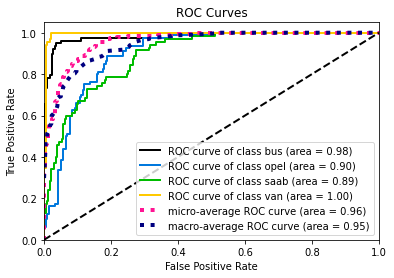

In [22]:
Training(pipeline, params_grid, cv, scorers, True)

**_<font color=blue>Conclusions:</font>_**

- The ROC-AUC score is quite good for all classes.
- Classes `opel` and `saab` did comparatively worse than `van` and `bus` (which have (almost) perfect score). This means that some observations from other classes (negative instances) were wrongly classified as positive (as `opel` and `saab`, respectively).
-  $\text{ROC-AUC}_{\text{macro}} <$ $< \text{ROC-AUC}_{\text{micro}}$, since with $\text{ROC-AUC}_{\text{macro}}$ the perfect scores of `bus` and `van` are driven down by the worse scores of `opel` and `saab`, because macro score will always give the same importance (weight) to each individual score.
- At the moment I run the code, `accuracy` is slightly higher than `f1`. From the definition of `accuracy` and `f1` we can derive that `accuracy` $>$ `f1` $\iff TN > TP$. In our case this implies that our model is slightly better at predicting an instance's negative class than the positive class (i.e. our model is more confident rejecting an instance out of the respective class that accepting it). If `accuracy` $<$ `f1` is the other way around.
- Different runs will gives different relations between `f1` and `accuracy` due to the resulting shuffled split we got.

In [23]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [24]:
### YOUR CODE HERE

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()

In [27]:
pca.fit(X_train)

PCA()

In [28]:
evr_cum = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Explained Variance')

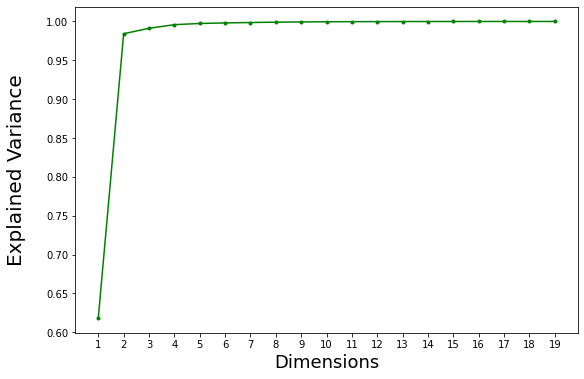

In [29]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(1, X_train.shape[1] + 1), evr_cum, 'g.-')
_ = plt.xticks(np.arange(1, 20))
plt.xlabel('Dimensions', fontsize=18)
plt.ylabel('Explained Variance', rotation=90, fontsize=20, labelpad=20)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**_<font color=blue>Observations:</font>_**

Above we performed PCA on the training data without normalization. We notice that

In [30]:
np.argmax(evr_cum >= 0.98) + 1

2

That is, more that $98\%$ of the dataset's variance lies along the first $2$ axis. So $2/19 \approx 0.10 < 11\%$ of the features explains $98\%$ of the variance of the whole data. This means that either:

- Most of the features are linearly dependent, which is a bold conclusion considering that we don't know what the features are about.
- PCA was influenced by the scale of the features. It'd be better if we normalize them and perform PCA again.

In [31]:
### YOUR CODE HERE

In [32]:
del pca
del evr_cum

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
pca = PCA()

In [36]:
pca.fit(X_train_scaled)

PCA()

In [37]:
evr_cum = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Explained Variance')

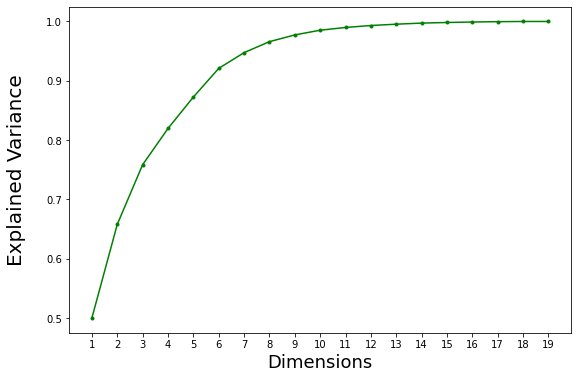

In [38]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(1, X_train.shape[1] + 1), evr_cum, 'g.-')
_ = plt.xticks(np.arange(1, 20))
plt.xlabel('Dimensions', fontsize=18)
plt.ylabel('Explained Variance', rotation=90, fontsize=20, labelpad=20)

In [39]:
d = np.argmax(evr_cum >= 0.95) + 1
d

8

In [40]:
evr_cum[d-1]

0.9659651631542158

**_<font color=blue>Observations:</font>_**

We'll use the first $8$ principal components, since with them we preserve more than the $95\%$ of the training set's variance.

(We could have also instanciated `pca = PCA(n_components=0.95)`).

-----

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

**_<font color=blue>Observations:</font>_**

We use `StandardScaler` instead of `CustomStandardScaler(scoring=True)`.

In [41]:
### YOUR CODE HERE

In [42]:
del pipeline
del params_grid

In [43]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=d)),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000))
])

In [44]:
params_grid = [
    {
        'log_reg__penalty': ['none'],
    },
    {
        'log_reg__penalty': ['l1', 'l2'],
        'log_reg__C': np.linspace(0.1, 5, 5),
    },
    {
        'log_reg__penalty': ['elasticnet'],
        'log_reg__l1_ratio': np.linspace(0.1, 1, 5, endpoint=False),
        'log_reg__C': np.linspace(0.1, 5, 5),
    }
]

In [45]:
scorers

['f1_macro', 'accuracy']

Model metric: f1_macro
	Best Parameters:

		log_reg__C          : 5.0
		log_reg__l1_ratio   : 0.28
		log_reg__penalty    : elasticnet

	f1_macro test score:               0.6411
	f1_macro train score:              0.6710

Model metric: accuracy
	Best Parameters:

		log_reg__C          : 5.0
		log_reg__l1_ratio   : 0.28
		log_reg__penalty    : elasticnet

	accuracy test score:               0.6498
	accuracy train score:              0.6812



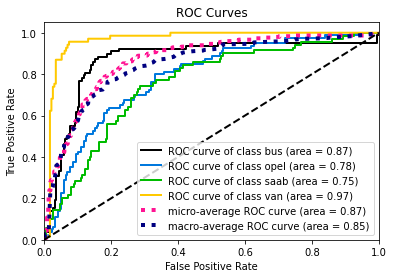

In [46]:
Training(pipeline, params_grid, cv, scorers, True)

**_<font color=blue>Conclusions:</font>_**

- The best model here performs comparably worse than the case above without PCA. This can happen if we consider that:

1. Logistic Regression is a loss function we used under the assumption that the target variable can be linearly represented by the feature variables ($\log(1 + \exp M_i)$ where $M_i = y_i x_i^{\top}w$).
2. PCA just transforms the data into direction vectors. That is, each vector is simultaneously _the best fit of the feature matrix_ **and** _perpendicular to the previous direction vectors (principal components)_. That is, the computation of the principal components just looks at (the variance of) the features.

This implies that after performing PCA the assumption that $y_i \approx  x_i^{\top}w$ is not guaranteed to be preserved. To take the linearity assumption into account we can, for example, have a look at Partial Least Squares.


#### 2.5. Decision tree
* Now train a decision tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [47]:
from sklearn.tree import DecisionTreeClassifier
# YOUR CODE HERE

In [48]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [49]:
Training(tree_clf, {'max_depth':np.arange(2, 16)}, cv, scorers)

Model metric: f1_macro
	Best Parameters:

		max_depth           : 9

	f1_macro test score:               0.6975
	f1_macro train score:              0.9311

Model metric: accuracy
	Best Parameters:

		max_depth           : 9

	accuracy test score:               0.6970
	accuracy train score:              0.9308



**_<font color=blue>Observations:</font>_**

- With both scores we see that the tree overfitted the training data quite bad, which differs from the results we got with Logistic Regression.

---

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensemble varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

**_<font color=blue>Observations:</font>_**

We'll use `sklearn.ensemble.BaggingClassifier`.

We'll set:

- `warm_start=True` in order to avoid training the $N-1$ previous estimators when adding the $N$-th one to the ensemble.
- `bootstrap=True` and `max_sample=1.0` to generate a new bootstrapped sample from the training data with the same size each time we add a new base estimator.

The averaging of the $N$ models' prediction is performs by the predict method of `BaggingClassifier` automatically.


In [64]:
# YOUR CODE HERE

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
params = dict(n_estimators=2, max_samples=1.0, bootstrap=True, warm_start=True, random_state=42)

In [67]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [68]:
def BaggingPlot(model, params, X_train, y_train, X_test, y_test, do_bagging=True):
    f1 = []
    acc = []
    clf = None
    
    name = type(model).__name__
    title = ''
    
    if do_bagging:
        clf = BaggingClassifier(
            model
        )
        clf.set_params(**params)
        
        title = 'Ensemble of ' + name
    else:
        clf = model
        clf.set_params(**params)

    for N in range(2, 101):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        f1.append(f1_score(y_test, y_pred, average='macro'))
        acc.append(accuracy_score(y_test, y_pred))

        clf.n_estimators += 1
    
    running_f1 = running_mean(f1, 10)
    running_acc = running_mean(acc, 10)
    
    print('Average f1_score: {:20.4f}'.format(np.mean(f1)))
    print('Average accuracy: {:20.4f}'.format(np.mean(acc)))
    
    m = np.arange(2, 101)
    plt.figure(figsize=(9,6))
    plt.title(title, fontsize=18)
    plt.plot(f1, 'b-', label=r'$f_1$ score')
    plt.plot(acc, 'g.-', label=r'accuracy')
    plt.plot(running_f1, 'k--', label=r'$f_1$ running mean')
    plt.plot(running_acc, 'r--', label=r'accuracy running mean')
    plt.legend(loc="lower right", prop={'size': 12})
    plt.xlabel('n estimators', fontsize=18)
    plt.ylabel('scores', rotation=90, fontsize=20, labelpad=20)

Average f1_score:               0.7395
Average accuracy:               0.7448


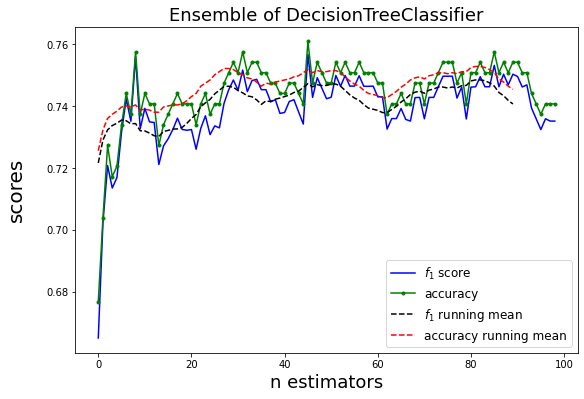

In [71]:
BaggingPlot(DecisionTreeClassifier(max_depth=9, random_state=11), params, X_train, y_train, X_test, y_test)

Average f1_score:               0.7874
Average accuracy:               0.7899


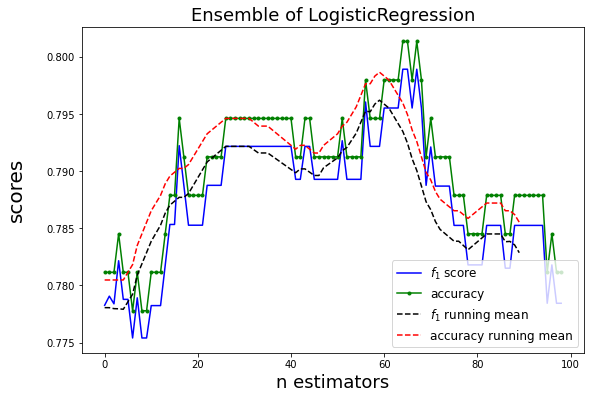

In [70]:
del scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    C=5.0, 
    penalty='l2', 
    multi_class='multinomial', 
    solver='saga', 
    tol=1e-3, 
    max_iter=500, 
    n_jobs=-1, random_state=32
)

BaggingPlot(log_reg, params, X_train_scaled, y_train, X_test_scaled, y_test)

**_<font color=blue>Questions asked:</font>_**
- Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.
- How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

**_<font color=blue>Conclusions:</font>_**
- Even though the scores stabilize around some value, they still have some jumps. This shows that adding a new classifier to the ensemble isn't necessarily followed by an subsequent improvement of the model's performance.
- With decision trees, the ensemble seems to stabilize around a score of $0.74$ after $40$ trees.
- With log reg, the ensemble doesn't quite stabilize. In this case, it turns out that training an ensemble of log reg classifiers doesn't provide much of a performance improvement as compared to training just one log reg classifier (done in the first part of the current notebook). This may be due to the fact 1) each time we add a log reg model to the ensemble, it's trained in a new shuffling of the data and 2) the convergence of the `saga` solver is sensitive to this.
- We use `max_depth=9` found in 2.5.. Even though one tree with `max_depth=9` gives worse scores and a big overfitting (as shown in 2.5) the ensemble seems to reduce these effects as can be seen from the test score we got.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [72]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [73]:
params = dict(n_estimators=2, max_samples=None, bootstrap=True, warm_start=True, random_state=42)

Average f1_score:               0.7539
Average accuracy:               0.7586


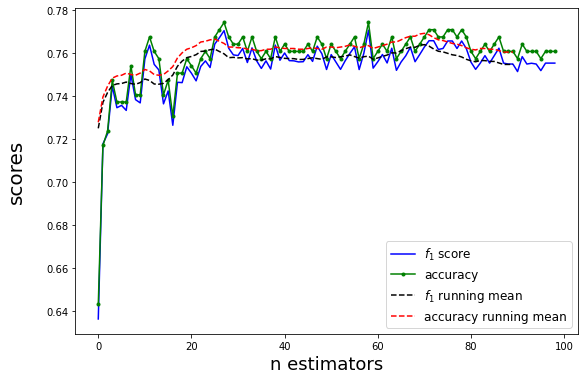

In [74]:
BaggingPlot(RandomForestClassifier(max_depth=8, random_state=42), params, X_train, y_train, X_test, y_test, do_bagging=False)

**_<font color=blue>Questions asked:</font>_**

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

**_<font color=blue>Conclusions:</font>_**

- It looks like the random forest model more or less stabilizes around $0.75$-$0.76$ after $30$ trees, which are less trees than for bagged decision trees ($40$). This may to the fact that random forest is able to generalizes faster since aside of bagging it performs random feature sampling, making each tree in the forest more uncorrelated to each other.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Decision Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conclusions using it? 

In [75]:
def learning_curves(model):
    
    partition = np.linspace(1, len(X_train), 10, endpoint=True, dtype=np.int)
    partition = partition[1:]
    
    test_f1_scores = []
    test_acc_scores = []
    
    train_f1_scores = []
    train_acc_scores = []
    
    for m in partition:
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        
        train_f1_scores.append(f1_score(y_train[:m], y_train_pred, average='macro'))
        train_acc_scores.append(accuracy_score(y_train[:m], y_train_pred))
        
        test_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))
        test_acc_scores.append(accuracy_score(y_test, y_test_pred))
    
    
    name = type(model).__name__
    plt.figure(figsize=(9,6))
    plt.title(name, fontsize=18)
    
    plt.plot(partition, train_f1_scores, 'o--', color='orange', label=r'$f_1$ train score')
    plt.plot(partition, train_acc_scores,'--', color='blue', label=r'accuracy train score')
    
    plt.plot(partition, test_f1_scores, '-', color='orange', label=r'$f_1$ test score')
    plt.plot(partition, test_acc_scores,'-', color='blue', label=r'accuracy test score')
    plt.legend(loc="lower right", prop={'size': 12})
    plt.xlabel('train set size', fontsize=18)
    plt.ylabel('scores', rotation=90, fontsize=20, labelpad=20)

In [76]:
seed = 42

In [77]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=seed)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=1000, n_jobs=-1, random_state=seed)
rf_clf = RandomForestClassifier(max_depth=8, random_state=seed)

In [78]:
models = [tree_clf, log_reg, rf_clf]

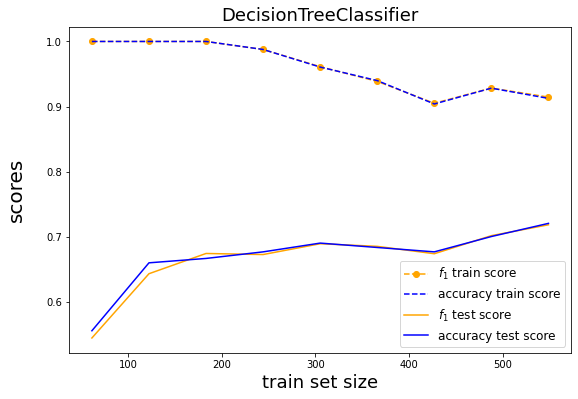

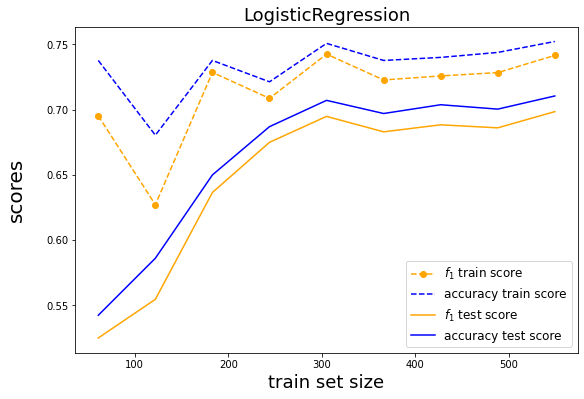

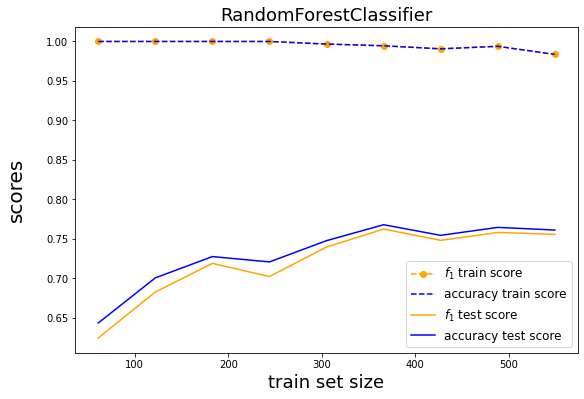

In [79]:
for model in models:
    learning_curves(model)

**_<font color=blue>Questions asked:</font>:_**

* Analyse the final plot. Can you make any conclusions using it? 

**_<font color=blue>Conclusions</font>:_**

- As we know, fitting **and** predicting on the same (training) set will produce high scores, since we are predicting in already-seen data. That's why train scores are high.
- _In general_, fitting on a small train set will produce a poor generalization when predicting on the test. This makes sense if we consider that a smaller train set may not contain (or may include too few) observations from a given class. That's why with a small train size the test scores are low.
- _Logistic Regression_: the test scores are continuously improving. In this case the model could benefit from more data, in order to ensure that the test and train scores do not diverge and/or start to converge to some higher value.
- _Decision Tree and Random Forest_: the test scores seems to have reach a plateau at around $0.70$ and $0.75$ respectively, and there is no convergence between the train and test score, which implies that the models may not benefit from more data.